In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('bike_rentals.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [23]:
df.drop(['datetime'],axis=1,inplace=True)

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

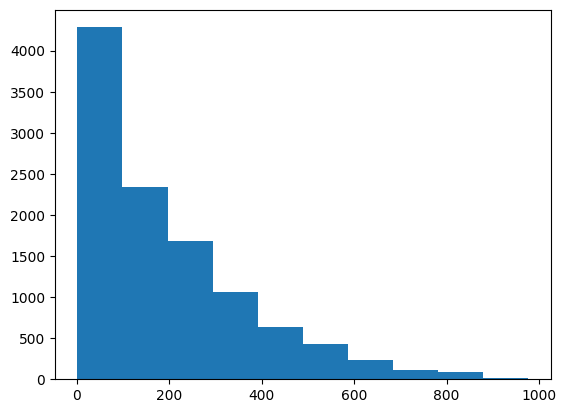

In [25]:
plt.hist(df['count'])

In [26]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [38]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor( criterion='squared_error',max_depth=10,min_samples_split=10,random_state=5)

In [39]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [40]:
y_pred = reg.predict(X_test)

In [41]:
y_pred

array([150.89473684, 138.85185185, 530.28571429, ..., 276.57142857,
       107.23529412,   4.        ])

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mean_squared_error(y_test,y_pred)

42.48451184182161

In [45]:

np.sqrt(mean_squared_error(y_test,y_pred))

6.5180144094518235

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cross_val_score(reg,X_train,y_train,cv=10)

array([0.99880832, 0.99868287, 0.99856755, 0.99853272, 0.99859473,
       0.99878097, 0.99872269, 0.99870756, 0.99876776, 0.99854917])